# Twitter Sentiment Analysis

This notebook is based on this [guide](https://betterprogramming.pub/twitter-sentiment-analysis-15d8892c0082)

In [1]:
import tweepy
from textblob import TextBlob 
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
# Twitter Api Credentials
import os
from dotenv import load_dotenv
load_dotenv()

apiKey = os.getenv('CONSUMER_KEY')
apiSecretKey= os.getenv('CONSUMER_SECRET')
accessToken= os.getenv('ACCESS_TOKEN')
AccessTokenSecret = os.getenv('ACCESS_TOKEN_SECRET')

In [3]:
# create authentication object
authenticate = tweepy.OAuthHandler(apiKey, apiSecretKey)
authenticate.set_access_token(accessToken, AccessTokenSecret )
api= tweepy.API(authenticate)

# By User
## Get Twitter Data

In [4]:
# Extract 100 tweets from the twitter user
posts = api.user_timeline(screen_name="BillGates", count = 100, lang ="en", tweet_mode="extended")

#  Print the last 5 tweets
print("Show the 5 recent tweets:\n")
i=1
for tweet in posts[:5]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i= i+1

Show the 5 recent tweets:

1) The COVID-19 pandemic reminds us why eradicating malaria is essential. Many of the building blocks we need to fight malaria and prevent the next pandemic are the same. #MosquitoWeek https://t.co/lC9eeVIN3J

2) Mosquitoes are the deadliest animal to humans, but @WMPglobal scientists have discovered how to transform one kind of mosquito into a surprisingly powerful ally: https://t.co/T6H9dVZYP0. #MosquitoWeek🦟 https://t.co/ENiniSLs9z

3) I don’t think any of @ronnychieng’s innovations are ready to bring to market. Luckily, brilliant scientists and engineers around the world have developed hundreds of exciting solutions that will prevent illness and death: https://t.co/x9lELyhV4c https://t.co/asEKuLP3Zm

4) I applaud David Vélez and Mariel Reyes’s pledge to dedicate the majority of their wealth to creating opportunity for the most vulnerable Latin American children and young adults: https://t.co/LGZ23efAVO

5) Thank you to @DonorsChoose, and to all 40,255 of 

In [5]:
# Create a dataframe with a column called Tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
# Show the first 5 rows of data
df.head()

,Tweets
0,The COVID-19 pandemic reminds us why eradicati...
1,"Mosquitoes are the deadliest animal to humans,..."
2,I don’t think any of @ronnychieng’s innovation...
3,I applaud David Vélez and Mariel Reyes’s pledg...
4,"Thank you to @DonorsChoose, and to all 40,255 ..."


In [6]:
# Create a function to clean the tweets
import re
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text


# Clean the tweets
df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Show the cleaned tweets
df

,Tweets
0,The COVID-19 pandemic reminds us why eradicati...
1,"Mosquitoes are the deadliest animal to humans,..."
2,I don’t think any of ’s innovations are ready ...
3,I applaud David Vélez and Mariel Reyes’s pledg...
4,"Thank you to , and to all 40,255 of you who do..."
...,...
95,: It's WorldTBDay\n\nEven as we battle COVID19...
96,I’m answering your questions now on :
97,"In this video, I answered some really good que..."
98,"After you finish your pancakes this morning, c..."


## Sentiments

In [7]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,Tweets,Subjectivity,Polarity
0,The COVID-19 pandemic reminds us why eradicati...,0.231250,0.125000
1,"Mosquitoes are the deadliest animal to humans,...",0.950000,0.450000
2,I don’t think any of ’s innovations are ready ...,0.650000,0.375000
3,I applaud David Vélez and Mariel Reyes’s pledg...,0.350000,0.025000
4,"Thank you to , and to all 40,255 of you who do...",0.000000,0.000000
...,...,...,...
95,: It's WorldTBDay\n\nEven as we battle COVID19...,0.000000,0.000000
96,I’m answering your questions now on :,0.000000,0.000000
97,"In this video, I answered some really good que...",0.866667,0.566667
98,"After you finish your pancakes this morning, c...",0.000000,0.000000


## WordCloud

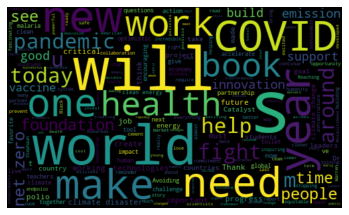

In [8]:
from wordcloud import WordCloud
# word cloud visualization
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## Analysis

In [9]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,The COVID-19 pandemic reminds us why eradicati...,0.231250,0.125000,Positive
1,"Mosquitoes are the deadliest animal to humans,...",0.950000,0.450000,Positive
2,I don’t think any of ’s innovations are ready ...,0.650000,0.375000,Positive
3,I applaud David Vélez and Mariel Reyes’s pledg...,0.350000,0.025000,Positive
4,"Thank you to , and to all 40,255 of you who do...",0.000000,0.000000,Neutral
...,...,...,...,...
95,: It's WorldTBDay\n\nEven as we battle COVID19...,0.000000,0.000000,Neutral
96,I’m answering your questions now on :,0.000000,0.000000,Neutral
97,"In this video, I answered some really good que...",0.866667,0.566667,Positive
98,"After you finish your pancakes this morning, c...",0.000000,0.000000,Neutral


### Positive Tweets

In [10]:
# Printing positive tweets 
print('Printing positive tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+ sortedDF['Tweets'][i])
    print()
    j= j+1

Printing positive tweets:

1) The COVID-19 pandemic reminds us why eradicating malaria is essential. Many of the building blocks we need to fight malaria and prevent the next pandemic are the same. MosquitoWeek 

2) Mosquitoes are the deadliest animal to humans, but  scientists have discovered how to transform one kind of mosquito into a surprisingly powerful ally:  MosquitoWeek🦟 

3) I don’t think any of ’s innovations are ready to bring to market. Luckily, brilliant scientists and engineers around the world have developed hundreds of exciting solutions that will prevent illness and death:  

4) I applaud David Vélez and Mariel Reyes’s pledge to dedicate the majority of their wealth to creating opportunity for the most vulnerable Latin American children and young adults: 

5) This collaboration’s impact is made possible through investments in the bipartisan infrastructure bill, which will unleash billions in private capital for clean energy projects throughout the U.S. if passed into 

### Negative Tweets

In [11]:
# Printing negative tweets  
print('Printing negative tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

Printing negative tweets:

1) Over the years, I’ve shared a stage with a jar of human feces, smelled pit latrine odor, and drunk water made from poop (and convinced  to drink it too). Was it worth it? You bet. Here’s why: 

2) Communities of color have been hit hard by COVID-19. One of the reasons why parts of the medical system often fail Black and brown people is because it’s not designed with them in mind. Dr. Stephaun Wallace wants to change that. 

3) Dr. Stephaun Wallace () has spent the last year helping make COVID-19 vaccines work for everybody. Stephaun and his colleagues at  are working to reach the people who are usually left behind. 

4) It’s deeply unfair that the people who contribute the least to climate change will suffer the worst from its effects:  



### Basic Charts

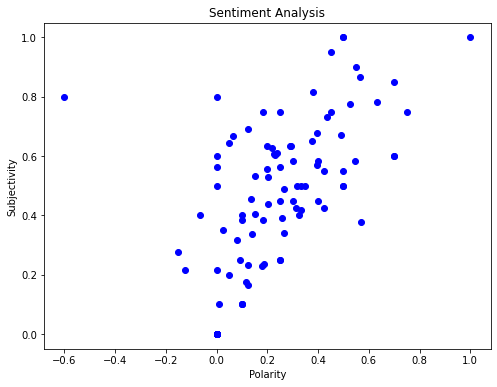

In [12]:
# Plotting 
plt.figure(figsize=(8,6)) 
for i in range(0, df.shape[0]):
    plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue') 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

In [13]:
# Print the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']
ptweets

round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)

78.0

In [14]:
# Print the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']
ntweets

round( (ntweets.shape[0] / df.shape[0]) * 100, 1)

4.0

In [15]:
# Show the value counts
df['Analysis'].value_counts()

Positive    78
Neutral     18
Negative     4
Name: Analysis, dtype: int64

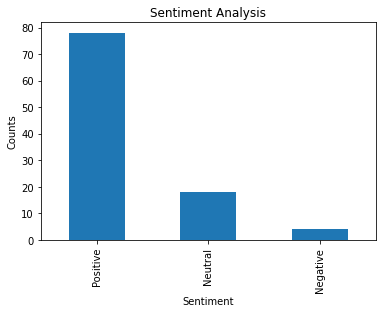

In [16]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()

# By Search 
## Get Twitter Data

In [17]:
# Extract 100 tweets from the twitter user
posts = api.search(q="Spiderman", count = 100, lang="en", tweet_mode="extended", result_type="mixed")

#  Print the last 5 tweets
print("Show the 5 recent tweets:\n")
i=1
for tweet in posts[:5]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i= i+1

Show the 5 recent tweets:

1) Top 5 Most Viewed Teaser - Trailer in first 24 hours globally. 

🌟Spiderman: No-way home: 355 million. 

🌟 Avengers - End Game: 289 million. 

🌟 Avengers - Infinity War: 230 million. 

🌟 The Lion King (2019): 224.6 million. 

🌟 It chapter 1 (2017): 197 million.

2) A piece done for Marvel licensing. Not sure if it's ever been used or not but you might see it from time to time on Marvel merch out in the world. #SpiderManNoWayHome #Spiderman #MarvelStudios https://t.co/DZL4pg118M

3) The Spider-Man #NoWayHome trailer gets animated in a viral remake using footage from the 90s #SpiderMan cartoon:  

https://t.co/OXj2du6hds https://t.co/nppMeawWYc

4) RT @albaaca_art: spiderman 3 predictions #doctorstrange #SpiderManNoWayHome https://t.co/3wOYhuf4hu

5) RT @imununununn: I asked him that did he watch the trailer of spiderman nwh yet he said he did and his reaction was sooooo into it 🤣🕸 https…



In [18]:
# Create a dataframe with a column called Tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
# Show the first 5 rows of data
df.head()

,Tweets
0,Top 5 Most Viewed Teaser - Trailer in first 24...
1,A piece done for Marvel licensing. Not sure if...
2,The Spider-Man #NoWayHome trailer gets animate...
3,RT @albaaca_art: spiderman 3 predictions #doct...
4,RT @imununununn: I asked him that did he watch...


In [19]:
# Clean the tweets
df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Show the cleaned tweets
df

,Tweets
0,Top 5 Most Viewed Teaser - Trailer in first 24...
1,A piece done for Marvel licensing. Not sure if...
2,The Spider-Man NoWayHome trailer gets animated...
3,_art: spiderman 3 predictions doctorstrange Sp...
4,: I asked him that did he watch the trailer of...
...,...
95,: alright so how can i get marvel to invite ma...
96,thank u im glad my og spiderman moots agree leah
97,$14\nKH\nFF X\nSSX\nNFS Underground 2\nSpiderm...
98,"Just a quick and simple edit I thought of, may..."


## Sentiments

In [20]:
# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,Tweets,Subjectivity,Polarity
0,Top 5 Most Viewed Teaser - Trailer in first 24...,0.346667,0.170000
1,A piece done for Marvel licensing. Not sure if...,0.888889,-0.250000
2,The Spider-Man NoWayHome trailer gets animated...,0.000000,0.000000
3,_art: spiderman 3 predictions doctorstrange Sp...,0.000000,0.000000
4,: I asked him that did he watch the trailer of...,0.000000,0.000000
...,...,...,...
95,: alright so how can i get marvel to invite ma...,0.000000,0.000000
96,thank u im glad my og spiderman moots agree leah,1.000000,0.500000
97,$14\nKH\nFF X\nSSX\nNFS Underground 2\nSpiderm...,0.000000,0.000000
98,"Just a quick and simple edit I thought of, may...",0.339286,0.208333


## Analysis

In [21]:
df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,Top 5 Most Viewed Teaser - Trailer in first 24...,0.346667,0.170000,Positive
1,A piece done for Marvel licensing. Not sure if...,0.888889,-0.250000,Negative
2,The Spider-Man NoWayHome trailer gets animated...,0.000000,0.000000,Neutral
3,_art: spiderman 3 predictions doctorstrange Sp...,0.000000,0.000000,Neutral
4,: I asked him that did he watch the trailer of...,0.000000,0.000000,Neutral
...,...,...,...,...
95,: alright so how can i get marvel to invite ma...,0.000000,0.000000,Neutral
96,thank u im glad my og spiderman moots agree leah,1.000000,0.500000,Positive
97,$14\nKH\nFF X\nSSX\nNFS Underground 2\nSpiderm...,0.000000,0.000000,Neutral
98,"Just a quick and simple edit I thought of, may...",0.339286,0.208333,Positive


### Positive tweets

In [22]:
# Printing positive tweets 
print('Printing positive tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
    if( sortedDF['Analysis'][i] == 'Positive'):
        print(str(j) + ') '+ sortedDF['Tweets'][i])
        print()
        j= j+1

Printing positive tweets:

1) Top 5 Most Viewed Teaser - Trailer in first 24 hours globally. 

🌟Spiderman: No-way home: 355 million. 

🌟 Avengers - End Game: 289 million. 

🌟 Avengers - Infinity War: 230 million. 

🌟 The Lion King (2019): 224.6 million. 

🌟 It chapter 1 (2017): 197 million.

2) : STOPPP OP ASKED MARK IF HE WATCHED THE NEW SPIDERMAN TRAILER AND THIS WAS HIS REACTION 😭


3) Probably going to binge watch Spiderman too in preparation for No Way Home. Spiderman 1, 2, 3, TASM 1&amp;2, Homecoming, Far From Home. All of it

4) ShowerThoughts episode 1: 
Okay so, DrStrange has reversed time so that knowbody remembers PeterParker is SpiderMan right?
 So does that mean, Tony is back alive because time got reversed?!?  SpiderManNoWayHome Marvel 

5) I need to rewatch Spiderman into the Spiderverse because that movie is so damn good.

6) 1 21  Yh I love TH Spiderman regardless. I just pointed one thing that I wanted to change. His characterisation of Peter is my favourite of the li

### Negative Tweets

In [23]:
# Printing negative tweets  
print('Printing negative tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
    if( sortedDF['Analysis'][i] == 'Negative'):
        print(str(j) + ') '+sortedDF['Tweets'][i])
        print()
        j=j+1

Printing negative tweets:

1) A piece done for Marvel licensing. Not sure if it's ever been used or not but you might see it from time to time on Marvel merch out in the world. SpiderManNoWayHome Spiderman MarvelStudios 

2) _thomas  21 Yeah me either, it's just a relatively minor plot point in his character arc, but i can't help it
I like when spiderman feels like a casual dude, and his suits being billion dollar killing machines don't fit in with that narrative

3) my partner, sitting through me talking about spiderman, knowing ill let them hit as soon as i shut up 

4) mark getting excited about the spiderman trailer i am SAD

5) : Waiting on insomniac to update us about the spiderman game 



### Basic Charts

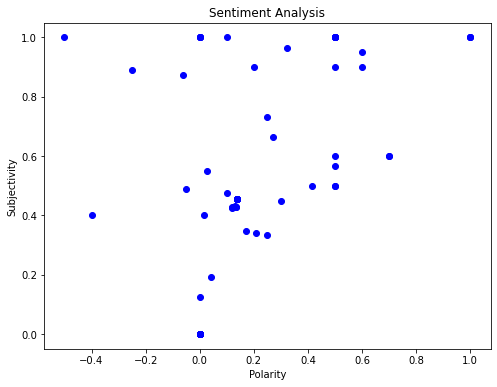

In [24]:
# Plotting 
plt.figure(figsize=(8,6)) 
for i in range(0, df.shape[0]):
    plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue') 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

In [25]:
# Print the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']
ptweets

round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)

44.0

In [26]:
# Print the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']
ntweets

round( (ntweets.shape[0] / df.shape[0]) * 100, 1)

5.0

In [27]:
# Show the value counts
df['Analysis'].value_counts()

Neutral     51
Positive    44
Negative     5
Name: Analysis, dtype: int64

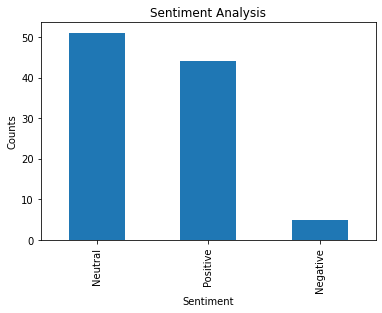

In [28]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()

# Tweets in another language 

## Get Twitter Data

In [109]:
# Extract 100 tweets from the twitter user
posts = api.search(q="Spiderman", count = 100, lang="es", tweet_mode="extended", result_type="mixed")

#  Print the last 5 tweets
print("Show the 5 recent tweets:\n")
i=1
for tweet in posts[:5]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i= i+1

Show the 5 recent tweets:

1) Oye @JuanSGuarnizo sé que te gusta mucho Spiderman, mira esto que te va a antojar bastante! 😊 https://t.co/NogePTQtO4

2) TÚ hiciste que esto sucediera. #SpiderMan #SinCaminoACasa rompió el récord mundial de 24 horas del tráiler más visto y comentado de la historia. ¡Gracias! https://t.co/YPpZxGpA9K

3) "¿Qué acaba de pasar?"
Mira el adelanto oficial de #SpiderMan: Sin Camino a Casa, exclusivamente en cines el 17 de diciembre. #SpiderManNoWayHome https://t.co/bzSEftE0tY

4) RT @FoshyMT: El carisma que tiene Spiderman lo tienen pocos, que hombre por dios

5) RT @SicarioRojas: acabo de volver a ver spiderman 2 de tobey maguire y estoy en condiciones de decir que es la mayor obra maestra del cine…



In [107]:
# Create a function to translate
def translateTweet(text):
    return TextBlob(text).translate(from_lang='es',to='en')

# Create function to store translated tweets in a DataFrame
def translateTweets(tweets): 
    translated_tweets =[]
    for tweet in tweets:
        translated_tweets.append(translateTweet((tweet.full_text)))
    df = pd.DataFrame(translated_tweets)
    df['Tweets_Translated'] = pd.Series(df.fillna('').values.tolist()).str.join('')
    df.drop(df.columns.difference(['Tweets_Translated']), 1, inplace=True)
    return df

In [110]:
# Create a dataframe with a column called Tweets and Tweets_Translated
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets']) 
df['Tweets_Translated'] = translateTweets(posts)
# Show the first 5 rows of data
df.head()

,Tweets,Tweets_Translated
0,Oye @JuanSGuarnizo sé que te gusta mucho Spide...,Hey @JuanSGuarnizo I know you like Spiderman a...
1,TÚ hiciste que esto sucediera. #SpiderMan #Sin...,YOU made this happen. #SpiderMan #SinCaminoACa...
2,"""¿Qué acaba de pasar?""\nMira el adelanto ofici...","""What has happened?""\nCheck out the official p..."
3,RT @FoshyMT: El carisma que tiene Spiderman lo...,RT @FoshyMT: The charisma that Spiderman has i...
4,RT @SicarioRojas: acabo de volver a ver spider...,RT @SicarioRojas: I just saw spiderman 2 by to...


In [111]:
# Clean the tweets
df['Tweets'] = df['Tweets'].apply(cleanTxt)
df['Tweets_Translated'] = df['Tweets_Translated'].apply(cleanTxt)
# Show the cleaned tweets
df

,Tweets,Tweets_Translated
0,"Oye sé que te gusta mucho Spiderman, mira est...","Hey I know you like Spiderman a lot, look at ..."
1,TÚ hiciste que esto sucediera. SpiderMan SinCa...,YOU made this happen. SpiderMan SinCaminoACasa...
2,"""¿Qué acaba de pasar?""\nMira el adelanto ofici...","""What has happened?""\nCheck out the official p..."
3,: El carisma que tiene Spiderman lo tienen poc...,": The charisma that Spiderman has is few, what..."
4,: acabo de volver a ver spiderman 2 de tobey m...,: I just saw spiderman 2 by tobey maguire agai...
...,...,...
95,Yo no entro al cine desde spiderman 3,I have not been to the cinema since spiderman 3
96,"1: si wey, ya vimos q te gusta spiderman ya du...","@ lesliefalcon01: yes wey, we already saw that..."
97,"El número 1 de Amazing Spiderman!!! PS5Share, ...",The number 1 of Amazing Spiderman !!! PS5Shar...
98,_: Vamos a ver Spiderman No Way Home y cada qu...,_: We are going to see Spiderman No Way Home a...


## Sentiments

In [112]:
# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets_Translated'].apply(getSubjectivity)
df['Polarity'] = df['Tweets_Translated'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,Tweets,Tweets_Translated,Subjectivity,Polarity
0,"Oye sé que te gusta mucho Spiderman, mira est...","Hey I know you like Spiderman a lot, look at ...",0.00,0.000
1,TÚ hiciste que esto sucediera. SpiderMan SinCa...,YOU made this happen. SpiderMan SinCaminoACasa...,0.35,0.375
2,"""¿Qué acaba de pasar?""\nMira el adelanto ofici...","""What has happened?""\nCheck out the official p...",0.00,0.000
3,: El carisma que tiene Spiderman lo tienen poc...,": The charisma that Spiderman has is few, what...",0.10,-0.200
4,: acabo de volver a ver spiderman 2 de tobey m...,: I just saw spiderman 2 by tobey maguire agai...,1.00,1.000
...,...,...,...,...
95,Yo no entro al cine desde spiderman 3,I have not been to the cinema since spiderman 3,0.00,0.000
96,"1: si wey, ya vimos q te gusta spiderman ya du...","@ lesliefalcon01: yes wey, we already saw that...",0.00,0.000
97,"El número 1 de Amazing Spiderman!!! PS5Share, ...",The number 1 of Amazing Spiderman !!! PS5Shar...,0.90,1.000
98,_: Vamos a ver Spiderman No Way Home y cada qu...,_: We are going to see Spiderman No Way Home a...,0.00,0.000


## Analysis

In [113]:
df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df

,Tweets,Tweets_Translated,Subjectivity,Polarity,Analysis
0,"Oye sé que te gusta mucho Spiderman, mira est...","Hey I know you like Spiderman a lot, look at ...",0.00,0.000,Neutral
1,TÚ hiciste que esto sucediera. SpiderMan SinCa...,YOU made this happen. SpiderMan SinCaminoACasa...,0.35,0.375,Positive
2,"""¿Qué acaba de pasar?""\nMira el adelanto ofici...","""What has happened?""\nCheck out the official p...",0.00,0.000,Neutral
3,: El carisma que tiene Spiderman lo tienen poc...,": The charisma that Spiderman has is few, what...",0.10,-0.200,Negative
4,: acabo de volver a ver spiderman 2 de tobey m...,: I just saw spiderman 2 by tobey maguire agai...,1.00,1.000,Positive
...,...,...,...,...,...
95,Yo no entro al cine desde spiderman 3,I have not been to the cinema since spiderman 3,0.00,0.000,Neutral
96,"1: si wey, ya vimos q te gusta spiderman ya du...","@ lesliefalcon01: yes wey, we already saw that...",0.00,0.000,Neutral
97,"El número 1 de Amazing Spiderman!!! PS5Share, ...",The number 1 of Amazing Spiderman !!! PS5Shar...,0.90,1.000,Positive
98,_: Vamos a ver Spiderman No Way Home y cada qu...,_: We are going to see Spiderman No Way Home a...,0.00,0.000,Neutral


### Positive tweets

In [114]:
# Printing positive tweets 
print('Printing positive tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
    if( sortedDF['Analysis'][i] == 'Positive'):
        print(str(j) + ') '+ sortedDF['Tweets'][i])
        print()
        j= j+1

Printing positive tweets:

1) TÚ hiciste que esto sucediera. SpiderMan SinCaminoACasa rompió el récord mundial de 24 horas del tráiler más visto y comentado de la historia. ¡Gracias! 

2) : acabo de volver a ver spiderman 2 de tobey maguire y estoy en condiciones de decir que es la mayor obra maestra del cine…

3) : Y asi comenzó esta locura hermosa, llamaba Spiderman 🕷💕

SpiderManNoWayHome 

4) : hola soy malena, tengo 15 y soy fan de marvel desde hace ya bastante tiempo. me gusta tanto xmen como el mcu, pero mis pe…

5) 666: Ayer estaba viendo la original de Spiderman con mis padres y tuve que contenerme la risa muy bestia cuando llegamos a e…

6) 666: Ayer estaba viendo la original de Spiderman con mis padres y tuve que contenerme la risa muy bestia cuando llegamos a e…

7) : Están raros los subtitulos del trailer de Spiderman 

8) Está bien que les guste el Spiderman de Tobey Maguire, pero hay que estar pero llevado del crack para decir que su interpretación es fiel al personaje.



### Negative Tweets 

In [115]:
# Printing negative tweets  
print('Printing negative tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
    if( sortedDF['Analysis'][i] == 'Negative'):
        print(str(j) + ') '+sortedDF['Tweets'][i])
        print()
        j=j+1

Printing negative tweets:

1) : El carisma que tiene Spiderman lo tienen pocos, que hombre por dios

2) : Ya tengo con quien ir a ver Spiderman no way home y ustedes pobres?

3) El carisma que tiene Spiderman lo tienen pocos, que hombre por dios 

4) q complicada la cronología de spiderman, innecesario meterle tantos universos

5) : Las primeras películas de Spiderman no están ni en Playdede ni en Cuevana.... Triste

6) Mi papá me dijo que quería ir a ver Spiderman NWH pero que no le entendió al tráiler.
Siento que fallé como fan de Marvel.



### Basic Charts 

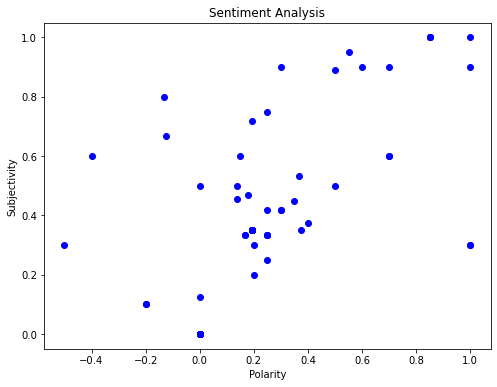

In [116]:
# Plotting 
plt.figure(figsize=(8,6)) 
for i in range(0, df.shape[0]):
    plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue') 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

In [117]:
# Print the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']
ptweets

round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)

46.0

In [118]:
# Print the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']
ntweets

round( (ntweets.shape[0] / df.shape[0]) * 100, 1)

6.0

In [119]:
# Show the value counts
df['Analysis'].value_counts()

Neutral     48
Positive    46
Negative     6
Name: Analysis, dtype: int64

In [121]:
# Just a reference to get info from api 
for info in posts[:3]:
    print("ID: {}".format(info.id))
    print(info.created_at)
    print(info.user.screen_name)
    print(info.full_text)
    print("\n")

ID: 1430862859177766915
2021-08-26 12:01:04
CooLifeGame
Oye @JuanSGuarnizo sé que te gusta mucho Spiderman, mira esto que te va a antojar bastante! 😊 https://t.co/NogePTQtO4


ID: 1430999284317523970
2021-08-26 21:03:10
SonyPicturesMX
TÚ hiciste que esto sucediera. #SpiderMan #SinCaminoACasa rompió el récord mundial de 24 horas del tráiler más visto y comentado de la historia. ¡Gracias! https://t.co/YPpZxGpA9K


ID: 1429992823949045767
2021-08-24 02:23:51
MarvelLATAM
"¿Qué acaba de pasar?"
Mira el adelanto oficial de #SpiderMan: Sin Camino a Casa, exclusivamente en cines el 17 de diciembre. #SpiderManNoWayHome https://t.co/bzSEftE0tY




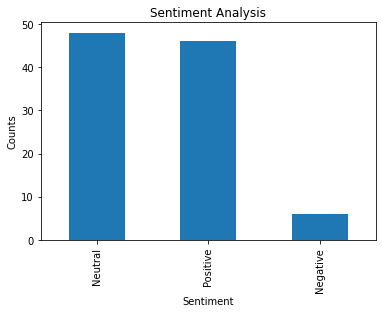

In [120]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()